In [2]:
#neural network model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('../generated_cpu_data_with_anomaly_v2.csv')
df['date'] = pd.to_datetime(df['date'])

In [4]:
df

,cpu_util,date,anomaly
0,89.447320,2023-06-25 00:03:05.640,1
1,57.320538,2023-06-25 00:08:05.640,0
2,87.058688,2023-06-25 00:13:05.640,1
3,87.409467,2023-06-25 00:18:05.640,1
4,78.111494,2023-06-25 00:23:05.640,0
...,...,...,...
8635,2.692620,2023-07-24 23:38:06.441,0
8636,30.604348,2023-07-24 23:43:06.441,1
8637,14.278655,2023-07-24 23:48:06.441,0
8638,35.247145,2023-07-24 23:53:06.441,1


In [5]:
num_lags = 2

#add lag
for i in range(1, num_lags+1):
    df['lag_{}'.format(i)] = df['cpu_util'].shift(i)
  
df = df.dropna()

In [6]:
df

,cpu_util,date,anomaly,lag_1,lag_2
2,87.058688,2023-06-25 00:13:05.640,1,57.320538,89.447320
3,87.409467,2023-06-25 00:18:05.640,1,87.058688,57.320538
4,78.111494,2023-06-25 00:23:05.640,0,87.409467,87.058688
5,65.111306,2023-06-25 00:28:05.640,0,78.111494,87.409467
6,94.526610,2023-06-25 00:33:05.640,1,65.111306,78.111494
...,...,...,...,...,...
8635,2.692620,2023-07-24 23:38:06.441,0,16.306464,30.297529
8636,30.604348,2023-07-24 23:43:06.441,1,2.692620,16.306464
8637,14.278655,2023-07-24 23:48:06.441,0,30.604348,2.692620
8638,35.247145,2023-07-24 23:53:06.441,1,14.278655,30.604348


In [7]:
X = df[['cpu_util', 'lag_1', 'lag_2']]
y = df['anomaly']

In [8]:
X['cpu_util'] = (X['cpu_util']/100).astype(float)
X['lag_1'] = (X['lag_1']/100).astype(float)
X['lag_2'] = (X['lag_2']/100).astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3277832909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cpu_util'] = (X['cpu_util']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3277832909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lag_1'] = (X['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3277832909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [9]:
X_train = X[:int(0.7*len(X))]
X_test = X[int(0.7*len(X)):]
y_train = y[:int(0.7*len(y))]
y_test = y[int(0.7*len(y)):]

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3789776307.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:int(0.7*len(y))]
C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3789776307.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[int(0.7*len(y)):]


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(3, 1), return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


189/189 [==============================] - 6s 12ms/step - loss: 0.3849 - accuracy: 0.8956 - val_loss: 0.3534 - val_accuracy: 0.8912
Epoch 2/20
189/189 [==============================] - 1s 7ms/step - loss: 0.3244 - accuracy: 0.9014 - val_loss: 0.3417 - val_accuracy: 0.8912
Epoch 3/20
189/189 [==============================] - 1s 7ms/step - loss: 0.3162 - accuracy: 0.9014 - val_loss: 0.3328 - val_accuracy: 0.8912
Epoch 4/20
189/189 [==============================] - 2s 8ms/step - loss: 0.3018 - accuracy: 0.9014 - val_loss: 0.2931 - val_accuracy: 0.8912
Epoch 5/20
189/189 [==============================] - 2s 10ms/step - loss: 0.2575 - accuracy: 0.9022 - val_loss: 0.2983 - val_accuracy: 0.8916
Epoch 6/20
189/189 [==============================] - 1s 7ms/step - loss: 0.2128 - accuracy: 0.9161 - val_loss: 0.1930 - val_accuracy: 0.9286
Epoch 7/20
189/189 [==============================] - 1s 7ms/step - loss: 0.1954 - accuracy: 0.9218 - val_loss: 0.1873 - val_accuracy: 0.9225
Ep

In [13]:
model.evaluate(X_test, y_test)

19/81 [======>.......................] - ETA: 0s - loss: 0.1558 - accuracy: 0.9391

81/81 [==============================] - 0s 4ms/step - loss: 0.1696 - accuracy: 0.9279


[0.16956005990505219, 0.9278549551963806]

In [14]:
model.predict([[0.823, 0.3, 0.3]])

1/1 [==============================] - 1s 871ms/step


array([[0.959458]], dtype=float32)

In [15]:
#get the test data
df_test = pd.read_csv('../generated_cpu_data_test.csv')

In [16]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [17]:
df_test

,cpu_util,date
0,66.834766,2023-07-25 00:03:06.466
1,82.067813,2023-07-25 00:08:06.466
2,100.895190,2023-07-25 00:13:06.466
3,73.259342,2023-07-25 00:18:06.466
4,82.504274,2023-07-25 00:23:06.466
...,...,...
1435,17.553220,2023-07-29 23:38:06.568
1436,36.001713,2023-07-29 23:43:06.568
1437,21.256935,2023-07-29 23:48:06.568
1438,24.075016,2023-07-29 23:53:06.568


In [18]:
#add lag
for i in range(1, num_lags+1):
    df_test['lag_{}'.format(i)] = df_test['cpu_util'].shift(i)
    
df_test = df_test.dropna()

In [19]:
df_test

,cpu_util,date,lag_1,lag_2
2,100.895190,2023-07-25 00:13:06.466,82.067813,66.834766
3,73.259342,2023-07-25 00:18:06.466,100.895190,82.067813
4,82.504274,2023-07-25 00:23:06.466,73.259342,100.895190
5,62.700953,2023-07-25 00:28:06.466,82.504274,73.259342
6,88.266038,2023-07-25 00:33:06.466,62.700953,82.504274
...,...,...,...,...
1435,17.553220,2023-07-29 23:38:06.568,50.442835,49.355296
1436,36.001713,2023-07-29 23:43:06.568,17.553220,50.442835
1437,21.256935,2023-07-29 23:48:06.568,36.001713,17.553220
1438,24.075016,2023-07-29 23:53:06.568,21.256935,36.001713


In [20]:
X_test = df_test[['cpu_util', 'lag_1', 'lag_2']]

X_test['cpu_util'] = (X_test['cpu_util']/100).astype(float)
X_test['lag_1'] = (X_test['lag_1']/100).astype(float)
X_test['lag_2'] = (X_test['lag_2']/100).astype(float)

X_test = np.array(X_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_20988\1139415797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cpu_util'] = (X_test['cpu_util']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_20988\1139415797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['lag_1'] = (X_test['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_20988\1139415797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [21]:
predict = model.predict(X_test)

45/45 [==============================] - 0s 3ms/step


In [22]:
predict

array([[0.35328263],
       [0.0014258 ],
       [0.00620669],
       ...,
       [0.00174909],
       [0.00208761],
       [0.00072417]], dtype=float32)

In [23]:
#add the prediction to the test data
df_test['predict'] = predict


C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3300978574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = predict


In [24]:
df_test['predict'] = df_test['predict'].apply(lambda x: 1 if x > 0.3 else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3575207046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = df_test['predict'].apply(lambda x: 1 if x > 0.3 else 0)


In [25]:
df_test

,cpu_util,date,lag_1,lag_2,predict
2,100.895190,2023-07-25 00:13:06.466,82.067813,66.834766,1
3,73.259342,2023-07-25 00:18:06.466,100.895190,82.067813,0
4,82.504274,2023-07-25 00:23:06.466,73.259342,100.895190,0
5,62.700953,2023-07-25 00:28:06.466,82.504274,73.259342,0
6,88.266038,2023-07-25 00:33:06.466,62.700953,82.504274,0
...,...,...,...,...,...
1435,17.553220,2023-07-29 23:38:06.568,50.442835,49.355296,0
1436,36.001713,2023-07-29 23:43:06.568,17.553220,50.442835,0
1437,21.256935,2023-07-29 23:48:06.568,36.001713,17.553220,0
1438,24.075016,2023-07-29 23:53:06.568,21.256935,36.001713,0


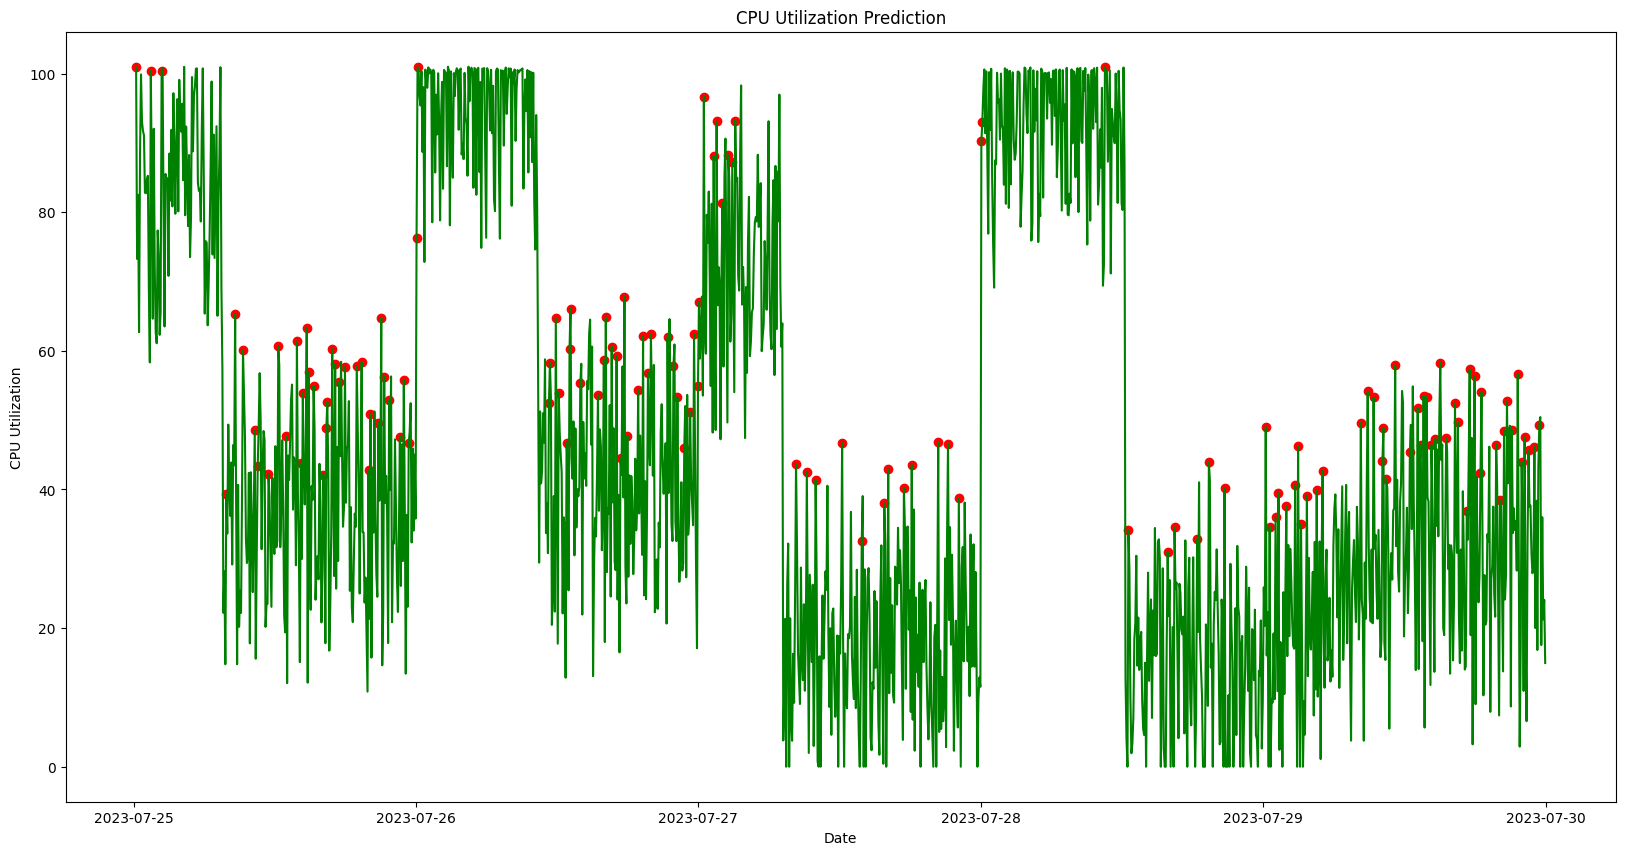

In [26]:
#scatter plot the prediction 1
anomaly = df_test.iloc[np.where(df_test['predict'] == 1)]

plt.figure(figsize=(20,10))
plt.plot(df_test['date'], df_test['cpu_util'], color='green')
plt.scatter(anomaly['date'], anomaly['cpu_util'], color='red')
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Prediction')
plt.show()



In [27]:
5.8755025e-02

0.058755025